In [ ]:
# Queda a mejorar el gráfico, contempla solo los valores puestos en el csv, esto no esta mal ya que la recta trata de predecir los valores contemplados entre su min y max
# pero queda un poco más prolija de otra manera

# Para la proxima usaré pandas y un dataFrame

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
# Estructuras iniciales

listaX = [] # Años de afiliación
listaY = [] # Nivel de satisfacción

In [3]:
# Leo archivos y levanto datos

file_patch = 'satisfaccion.csv'
data = pd.read_csv(file_patch, header=None)

listaX = data[0].tolist()
listaY = data[1].tolist()

In [4]:
# Debemos entrar dato por dato, si usamos la lista de una el mismo visual studio code nos dira array.reshape(-1, 1)

listaX_reshaped = np.array(listaX).reshape((-1, 1))
listaY_reshaped = np.array(listaY).reshape((-1, 1))

# print(listaX_reshaped)
# # print(listaY_reshaped)

In [5]:
# Objeto LinearRegression()

regresion = linear_model.LinearRegression()
modelo = regresion.fit(listaX_reshaped, listaY_reshaped) 

# y = mx + b
print(f"Intersección (b): {modelo.intercept_}")
print(f"Pendiente(m): {modelo.coef_}")

m = modelo.coef_ # Estos datos serán de type np.darray, ver como pasarlos a int o float y solucionar el problema de la función predictoria
b =  modelo.intercept_
# Fue super preciso, mis valores hechos a mano son practicamente los mismos, una cosa de locos

Intersección (b): [3.118]
Pendiente(m): [[0.474]]


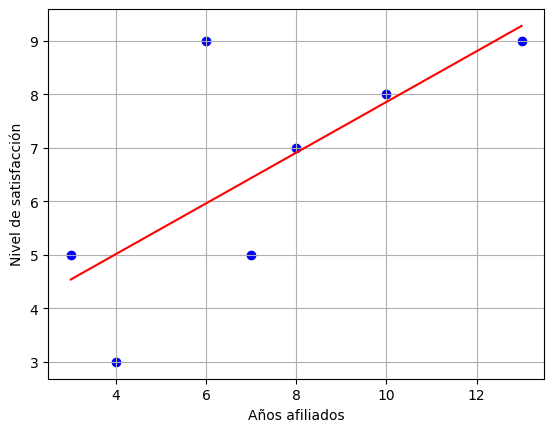

In [7]:
# Puntos en el aire:

# Agregar cuadricula
plt.grid(True, zorder=0)

# Gráficar los datos
plt.scatter(listaX_reshaped, listaY_reshaped, color='blue', zorder=1)

plt.xlabel("Años afiliados")  
plt.ylabel("Nivel de satisfacción")  

# Gráficar la recta
x_values = np.linspace(min(listaX_reshaped), max(listaX_reshaped), 12)
y_values = m * x_values + b
plt.plot(x_values, y_values, color='red', zorder=2, label=f'y = {m}x + {b}')


# Mostrar la gráfica
plt.show()

In [15]:
# Función que trata de predecir los años de afiliación y el nivel safistacción

def nivel_de_satisfaccion_con_años(años) -> str:
    if min(listaX) > años or max(listaX) < años:
        raise ValueError(f"El modelo no contempla {años} de afiliación.")
    else:
        m_float = float(m)
        b_float = float(b)
        satisfaccion = (m_float*años) + b_float # m*años+b
        return f"Los afiliados al sindicato con {años} tienen un nivel de satisfacción de {round(satisfaccion, 2)}" # Al ser pocos valores no esta demás no discriminar todos los valores
        # No hago otra vez el gráfico con el punto donde corresponda (años, safistaccion) dado que considero que es hacer lo mismo y agregar una línea de código, en este momento no aporta nada

In [ ]:
# Por un tema mio voy a verificar de que tipo son ciertos datos
nivel_de_satisfaccion_con_años(11)